In [1]:
from qutip.qip.circuit import QubitCircuit, Measurement, Gate
from qutip import basis, tensor, identity
from math import sqrt
from qutip.qip import measurement

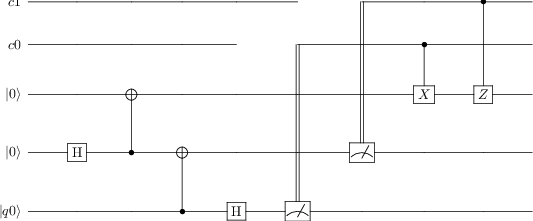

In [20]:
teleportation = QubitCircuit(3, num_cbits = 2, input_states = ["q0", "0", "0", "c0", "c1"])

teleportation.add_gate("SNOT", targets=[1])
teleportation.add_gate("CNOT", targets=[2], controls=[1])

teleportation.add_gate("CNOT", targets=[1], controls=[0])
teleportation.add_gate("SNOT", targets=[0])

teleportation.add_gate("X", targets=[2], classical_controls=[0])
teleportation.add_gate("Z", targets=[2], classical_controls=[1])

teleportation.add_measurement("M0", targets=[0], classical_store=0, index=[4])
teleportation.add_measurement("M1", targets=[1], classical_store=1, index=[5])

teleportation

In [7]:
a = 1/sqrt(2) * basis(2, 0) + 1/sqrt(2) * basis(2, 1)
state = tensor(a, basis(2,0), basis(2,0))
initial_measurement = Measurement("start", targets=[0])
initial_measurement.measurement_comp_basis(state)

In [8]:
state_final = teleportation.run(state)

In [11]:
final_measurement = Measurement("start", targets=[2])
final_measurement.measurement_comp_basis(state_final)

[[0.4999999999999999, 0.4999999999999996],
 [Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
  Qobj data =
  [[0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 1. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]],
  Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
  Qobj data =
  [[0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 1.]]]]

In [13]:
state = tensor(basis(2,1), basis(2,0), basis(2,0))
initial_measurement = Measurement("start", targets=[0])
initial_measurement.measurement_comp_basis(state)

[[0.0, 1.0],
 [Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
  Qobj data =
  [[0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]],
  Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
  Qobj data =
  [[0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 1. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]]]]

In [14]:
state_final = teleportation.run(state)
print(state_final)

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]


In [15]:
final_measurement = Measurement("start", targets=[2])
final_measurement.measurement_comp_basis(state_final)

[[1.0, 0.0],
 [Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
  Qobj data =
  [[0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 1. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]],
  Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
  Qobj data =
  [[0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0.]]]]

In [16]:
measurement.measurement_statistics(tensor(identity(2), identity(2), identity(2)), state_final)

(array([1., 1., 1., 1., 1., 1., 1., 1.]),
 array([Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2, 2